In [9]:
import random
import matplotlib.pyplot as plt

class build_matrix:
    
    def __init__( self, length, breadth ):
        self.floor_matrix = [ [ 0 for i in range( breadth ) ] for j in range( length ) ]
        self.arr = {}
        self.source = ( -1, -1 )
        self.receiver = ( -1, -1 )
        for i in range( len( self.floor_matrix )  ):
            self.floor_matrix[ i ][ 0 ] = 1
            self.floor_matrix[ i ][ 1 ] = 1
            self.floor_matrix[ i ][ len( self.floor_matrix[ 0 ] ) - 1 ] = 1
            self.floor_matrix[ i ][ len( self.floor_matrix[ 0 ] ) - 2 ] = 1
            self.arr[ ( i, 0 ) ] = 180
            self.arr[ ( i, len( self.floor_matrix[ 0 ] ) - 1 ) ] = 180
            self.arr[ ( i, 1 ) ] = 180
            self.arr[ ( i, len( self.floor_matrix[ 0 ] ) - 2 ) ] = 180
        for j in range( len( self.floor_matrix[ 0 ] ) ):
            self.floor_matrix[ 0 ][ j ] = 1
            self.floor_matrix[ 1 ][ j ] = 1
            self.floor_matrix[ len( self.floor_matrix ) - 1 ][ j ] = 1
            self.floor_matrix[ len( self.floor_matrix ) - 2 ][ j ] = 1
            self.arr[ ( 0, j ) ] = 90
            self.arr[ ( len( self.floor_matrix ) - 1, j ) ] = 90
            self.arr[ ( 1, j ) ] = 90
            self.arr[ ( len( self.floor_matrix ) - 2, j ) ] = 90        

    def closed_rectangle_obstacle( self, p1, p4 ):
        for i in range( p1[ 0 ], p4[ 0 ] + 1 ):
            for j in range( p1[ 1 ], p4[ 1 ] + 1 ):
                self.floor_matrix[ i ][ j ] = 1
                if i < len( self.floor_matrix ) - 1:
                    self.floor_matrix[ i + 1 ][ j ] = 1
                if i > 0:
                    self.floor_matrix[ i - 1 ][ j ] = 1
                if j < len( self.floor_matrix[ 0 ] ) - 1:
                    self.floor_matrix[ i ][ j + 1 ] = 1
                if j > 0:
                    self.floor_matrix[ i ][ j - 1 ] = 1
        for i in range( p1[ 0 ], p4[ 0 ] + 1 ):
            self.arr[ ( i, p1[ 1 ] ) ] = 90
            self.arr[ ( i, p1[ 1 ] + 1 ) ] = 90
            if p1[ 1 ] > 0:
                    self.floor_matrix[ i ][ p1[ 1 ] - 1 ] = 1
                    self.arr[ ( i, p1[ 1 ] - 1 ) ] = 90        
        for i in range( p1[ 0 ], p4[ 0 ] + 1 ):
            self.arr[ ( i, p4[ 1 ] ) ] = 90
            self.arr[ ( i, p4[ 1 ] - 1 ) ] = 90
            if p4[ 1 ] < len( self.floor_matrix[ 0 ] ) - 1:
                    self.floor_matrix[ i ][ p4[ 1 ] + 1 ] = 1
                    self.arr[ ( i, p4[ 1 ] + 1 ) ] = 90    
        for i in range( p1[ 1 ], p4[ 1 ] + 1 ):
            self.arr[ ( p1[ 0 ], i ) ] = 180
            self.arr[ ( p1[ 0 ] + 1, i ) ] = 180
            if p1[ 0 ] > 0:
                    self.floor_matrix[ p1[ 0 ] - 1 ][ i ] = 1
                    self.arr[ ( p1[ 0 ] - 1, i ) ] = 180   
        for i in range( p1[ 1 ], p4[ 1 ] + 1 ):
            self.arr[ ( p4[ 0 ], i ) ] = 180
            self.arr[ ( p4[ 0 ] - 1, i ) ] = 180
            if p4[ 0 ] < len( self.floor_matrix ) - 1:
                    self.floor_matrix[ p4[ 0 ] + 1 ][ i ] = 1
                    self.arr[ ( p4[ 0 ] + 1, i ) ] = 180   
        if p1[ 0 ]  > 0 and p1[ 1 ] > 0:
            self.floor_matrix[ p1[ 0 ] - 1 ][ p1[ 1 ] - 1 ] = 1
            self.arr[ ( p1[ 0 ] - 1, p1[ 1 ] - 1 )] = 90
        if p4[ 0 ] < len( self.floor_matrix ) - 1 and p4[ 1 ] < len( self.floor_matrix[ 0 ] ) - 1:
            self.floor_matrix[ p4[ 0 ] + 1 ][ p4[ 1 ] + 1 ] = 1
            self.arr[ ( p4[ 0 ] + 1, p4[ 1 ] + 1 )] = 90
        if p1[ 0 ]  > 0 and p4[ 1 ] < len( self.floor_matrix[ 0 ] ) - 1:
            self.floor_matrix[ p1[ 0 ] - 1 ][ p4[ 1 ] + 1 ] = 1
            self.arr[ ( p1[ 0 ] - 1, p4[ 1 ] + 1 )] = 90
        if p4[ 0 ] < len( self.floor_matrix ) - 1 and p1[ 1 ] > 0:
            self.floor_matrix[ p4[ 0 ] + 1 ][ p1[ 1 ] - 1 ] = 1
            self.arr[ ( p4[ 0 ] + 1, p1[ 1 ] - 1 )] = 90

    def wall_obstacle( self, p1, p2 ):
        angle = math.atan2( p2[ 1 ] - p1[ 1 ], p2[ 0 ] - p1[ 0 ] ) * ( 180 / math.pi )
        all_points = list( bresenham( p1[ 0 ], p1[ 1 ], p2[ 0 ], p2[ 1 ] ) )
        for p in all_points:
            self.floor_matrix[ p[ 0 ] ][ p[ 1 ] ] = 1
            self.arr[ p ] = angle
            if p[ 0 ] < len( self.floor_matrix ) - 1:
                self.floor_matrix[ p[ 0 ] + 1 ][ p[ 1 ] ] = 1
                self.arr[ ( p[ 0 ] + 1, p[ 1 ] ) ] = angle            
                if p[ 1 ] < len( self.floor_matrix[ 0 ] ) - 1:
                    self.floor_matrix[ p[ 0 ] ][ p[ 1 ] + 1 ] = 1
                    self.arr[ ( p[ 0 ], p[ 1 ] + 1 ) ] = angle
                    self.floor_matrix[ p[ 0 ] + 1 ][ p[ 1 ] + 1 ] = 1
                    self.arr[ ( p[ 0 ] + 1, p[ 1 ] + 1 ) ] = angle
                if p[ 1 ] > 0:
                    self.floor_matrix[ p[ 0 ] ][ p[ 1 ] - 1 ] = 1
                    self.arr[ ( p[ 0 ] , p[ 1 ] - 1 ) ] = angle
                    self.floor_matrix[ p[ 0 ] + 1 ][ p[ 1 ] - 1 ] = 1
                    self.arr[ ( p[ 0 ] + 1, p[ 1 ] - 1 ) ] = angle

            if p[ 0 ] > 0:
                self.floor_matrix[ p[ 0 ] - 1 ][ p[ 1 ] ] = 1
                self.arr[ ( p[ 0 ] - 1, p[ 1 ] ) ] = angle 
                if p[ 1 ] < len( self.floor_matrix[ 0 ] ) - 1:
                    self.floor_matrix[ p[ 0 ] ][ p[ 1 ] + 1 ] = 1
                    self.arr[ ( p[ 0 ], p[ 1 ] + 1 ) ] = angle
                    self.floor_matrix[ p[ 0 ] - 1 ][ p[ 1 ] + 1 ] = 1
                    self.arr[ ( p[ 0 ] - 1, p[ 1 ] + 1 ) ] = angle
                if p[ 1 ] > 0:
                    self.floor_matrix[ p[ 0 ] ][ p[ 1 ] - 1 ] = 1
                    self.arr[ ( p[ 0 ] , p[ 1 ] - 1 ) ] = angle
                    self.floor_matrix[ p[ 0 ] - 1 ][ p[ 1 ] - 1 ] = 1
                    self.arr[ ( p[ 0 ] - 1, p[ 1 ] - 1 ) ] = angle
                    
    def randomise_source( self ):
        self.source = ( -1, -1 )
        while self.source == ( -1, -1 ):
            self.source = ( random.randint( 0, len( self.floor_matrix ) - 1 ), random.randint( 0, len( self.floor_matrix[ 0 ] ) - 1 ) )
            if self.floor_matrix[ self.source[ 0 ] ][ self.source[ 1 ] ] == 1:
                self.source = ( -1, -1 )
                continue
            if self.floor_matrix[ self.source[ 0 ] + 1 ][ self.source[ 1 ] ] == 1:
                self.source = ( -1, -1 )
                continue
            if self.floor_matrix[ self.source[ 0 ] ][ self.source[ 1 ] + 1 ] == 1:
                self.source = ( -1, -1 )
                continue
            if self.floor_matrix[ self.source[ 0 ] - 1 ][ self.source[ 1 ] ] == 1:
                self.source = ( -1, -1 )
                continue
            if self.floor_matrix[ self.source[ 0 ] ][ self.source[ 1 ] - 1 ] == 1:
                self.source = ( -1, -1 )
                continue
            if self.floor_matrix[ self.source[ 0 ] + 2 ][ self.source[ 1 ] ] == 1:
                self.source = ( -1, -1 )
                continue
            if self.floor_matrix[ self.source[ 0 ] ][ self.source[ 1 ] + 2 ] == 1:
                self.source = ( -1, -1 )
                continue
            if self.floor_matrix[ self.source[ 0 ] - 2 ][ self.source[ 1 ] ] == 1:
                self.source = ( -1, -1 )
                continue
            if self.floor_matrix[ self.source[ 0 ] ][ self.source[ 1 ] - 2 ] == 1:
                self.source = ( -1, -1 )
                continue
        print( "Source:", end = ' ' )
        print( self.source )   
        
        
    def randomise_receiver( self ):
        self.receiver = ( -1, -1 )
        while self.receiver == ( -1, -1 ) or self.receiver == self.source:
            self.receiver = ( random.randint( 0, len( self.floor_matrix ) - 1 ), random.randint( 0, len( self.floor_matrix[ 0 ] ) - 1 ) )
            if self.floor_matrix[ self.receiver[ 0 ] ][ self.receiver[ 1 ] ] == 1:
                self.receiver = ( -1, -1 )
                continue
            if self.floor_matrix[ self.receiver[ 0 ] + 1 ][ self.receiver[ 1 ] ] == 1:
                self.receiver = ( -1, -1 )
                continue
            if self.floor_matrix[ self.receiver[ 0 ] - 1 ][ self.receiver[ 1 ] ] == 1:
                self.receiver = ( -1, -1 )
                continue
            if self.floor_matrix[ self.receiver[ 0 ] ][ self.receiver[ 1 ] + 1 ] == 1:
                self.receiver = ( -1, -1 )
                continue
            if self.floor_matrix[ self.receiver[ 0 ] ][ self.receiver[ 1 ] - 1 ] == 1:
                self.receiver = ( -1, -1 )
                continue
            if self.floor_matrix[ self.receiver[ 0 ] + 2 ][ self.receiver[ 1 ] ] == 1:
                self.receiver = ( -1, -1 )
                continue
            if self.floor_matrix[ self.receiver[ 0 ] - 2 ][ self.receiver[ 1 ] ] == 1:
                self.receiver = ( -1, -1 )
                continue
            if self.floor_matrix[ self.receiver[ 0 ] ][ self.receiver[ 1 ] + 2 ] == 1:
                self.receiver = ( -1, -1 )
                continue
            if self.floor_matrix[ self.receiver[ 0 ] ][ self.receiver[ 1 ] - 2 ] == 1:
                self.receiver = ( -1, -1 )
                continue
        print( "Receiver: ", end = ' ' )
        print( self.receiver )
    
    def set_source_receiver( self, source, receiver ):
        self.source = source
        self.receiver = receiver
        
    def draw( self ):
        X = []
        Y = []
        for i in range( len( self.floor_matrix ) ):
            for j in range( len( self.floor_matrix[ 0 ] ) ):
                if self.floor_matrix[ i ][ j ] == 1:
                    X.append( i )
                    Y.append( j )
        plt.scatter( X, Y )
        plt.scatter( [ self.source[ 0 ] ],[ self.source[ 1 ] ] )
        plt.scatter( [ self.receiver[ 0 ] ], [ self.receiver[ 1 ] ] )
        plt.show()
        

In [10]:
import math
from bresenham import bresenham
import numpy as np
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.animation as FuncAnimation
distance_factor = 80
lidar_range = 150

class graph_formulation:
    
    def __init__( self, building_details ):
        self.paths = []
        self.intensity = [ [ 0 for i in range( len( building_details.floor_matrix[ 0 ] ) ) ] for j in range( len( building_details.floor_matrix ) ) ]
        self.building_matrix = building_details.floor_matrix
        self.source = building_details.source
        self.receiver = building_details.receiver
        self.profile = {}
        self.arr = building_details.arr
        self.avg_angle = [ [ 0 for i in range( len( building_details.floor_matrix[ 0 ] ) ) ] for j in range( len( building_details.floor_matrix ) ) ]
        self.flag = 0
        self.current_location = self.receiver
    
    def current_position_analyse():
        t = 1
        fi = open( "out.txt", 'r' )
        x = 0
        y = 0
        ang = 0
        trajectory_x = []
        trajectory_y = []
        for line in fi:
            words = line.split( '),' )
            words_a = words[ 12 ]
            words_a = words_a.split( '(' )
            words_a = words_a[ 1 ]
            acc = words_a.split( ',' )
            acc_x = float( acc[ 0 ] )
            acc_y = float( acc[ 1 ] )
            x = x + acc_x * ( t ** 2 ) / 2
            y = y + acc_y * ( t ** 2 ) / 2
            words_aa = words[ 10 ]
            words_aa = words_aa.split( '(' )
            words_aa = words_aa[ 1 ]
            aa = words_aa.split( ',' )
            aa_z = float( aa[ 2 ] )
            ang = ang + aa_z * ( t ** 2 ) / 2
            ang = ang + aa_z * ( t ** 2 ) / 2
            x1 = x * math.cos( math.pi * ang / 180 ) - y * math.sin( math.pi * ang / 180 )
            y1 = y * math.cos( math.pi * ang / 180 ) - x * math.sin( math.pi * ang / 180 )
            trajectory_x.append( x1 )
            trajectory_y.append( y1 ) 
        self.current_location = ( x, y )
    
    def ray_dfs( self, source, receiver, path, angle, intensity_initial, dist, alpha = 1, beta = 2 , distance_limit = 1000, mean = 0, variance = 0.01 ):
        if dist >= distance_limit:
            self.paths.append( path )
            return 
        # joblib - parallelise, non hori-ver surface
        if angle > 0 and angle < 180:
            r1 = ( len( self.building_matrix ) - 1 - source[ 0 ] ) / math.sin( math.pi * angle / 180 )
        elif angle == 0 or angle == 180:
            r1 = len( self.building_matrix )
        else:
            r1 = - source[ 0 ] / math.sin( math.pi * angle / 180 )
        if angle < 90 or angle > 270:
            r2 = ( len( self.building_matrix[ 0 ] ) - 1 - source[ 1 ] ) / math.cos( math.pi * angle / 180 )
        elif angle == 90 or angle == 270:
            r2 = len( self.building_matrix[ 0 ] )
        else:
            r2 = - source[ 1 ] / math.cos( math.pi * angle / 180 )
        r = min( r1, r2 )

        ep = ( source[ 0 ] + math.ceil( r * math.sin( math.pi * angle / 180 ) ), source[ 1 ] + math.ceil( r * math.cos( math.pi * angle / 180 ) ) )
        all_points = list( bresenham( source[ 0 ], source[ 1 ], ep[ 0 ], ep[ 1 ] ) )
        for p in all_points:
            norm = math.dist( np.array( source ), np.array( p ) )
            if dist + norm >= distance_limit:
                self.paths.append( path )
                break
            if p[ 0 ] >= len( self.building_matrix ) or p[ 1 ] >= len( self.building_matrix[ 0 ] ) or p[ 0 ] < 0 or p[ 1 ] < 0:
                self.paths.append( path )
                break
            if p == source:
                continue       
            path.append( p ) 
            if self.flag == 1:
                if self.building_matrix[ p[ 0 ] ][ p[ 1 ] ] != 0:
                    continue
                else:
                    self.flag = 0     
            dist = dist + norm
            intense = intensity_initial / dist ** alpha
            self.avg_angle[ p[ 0 ] ][ p[ 1 ] ] = ( self.intensity[ p[ 0 ] ][ p[ 1 ] ] * self.avg_angle[ p[ 0 ] ][ p[ 1 ] ] + intense * angle ) / ( self.intensity[ p[ 0 ] ][ p[ 1 ] ] + intense ) + + np.random.normal( mean, variance )
            self.intensity[ p[ 0 ] ][ p[ 1 ] ] = self.intensity[ p[ 0 ] ][ p[ 1 ] ] + intense
            if p == receiver:
                self.paths.append( path )
            if self.building_matrix[ p[ 0 ] ][ p[ 1 ] ] != 0:
                self.flag = 1
                self.ray_dfs ( p, receiver, path, 2 * self.arr[ p ] - angle, intense / beta, dist )
                break 
        return 
    
    def point_cloud( self, receiver, mean = 0.5, variance = 0.1, max_dist = lidar_range ):
        contour = {}
        for angle in range( 360 ):
            ep = ( receiver[ 0 ] + math.ceil( max_dist * math.cos( math.pi * angle / 180 ) ), receiver[ 1 ] + math.ceil( max_dist * math.sin( math.pi * angle / 180 ) ) )
            all_points = list( bresenham( receiver[ 0 ], receiver[ 1 ], ep[ 0 ], ep[ 1 ] ) )
            for p in all_points:
                if p[ 0 ] >= len( self.building_matrix ) - 1 or p[ 1 ] >= len( self.building_matrix[ 0 ] ) - 1:
                    if math.dist( p, receiver ) > max_dist:
                        contour[ angle ] = None
                    else:
                        noise_p = ( p[ 0 ] + np.random.normal( mean, variance ), p[ 1 ] + np.random.normal( mean, variance ) )
                        contour[ angle ] =  noise_p 
                    break
                elif self.building_matrix[ p[ 0 ] ][ p[ 1 ] ] != 0:                
                    if math.dist( p, receiver ) > max_dist:
                        contour[ angle ] = None
                    else:
                        noise_p = ( p[ 0 ] + np.random.normal( mean, variance ), p[ 1 ] + np.random.normal( mean, variance ) )
                        contour[ angle ] =  noise_p 
                    break
                elif p == ep:
                    contour[ angle ] = None
        return contour 
    
    def get_gaps( self, contour ):
        gap_angles = []
        for angle in range( 360 ):        
            if contour[ angle ] == None:  
                gap_angles.append( np.array( [ angle, 0 ] ) )
        dbscan = DBSCAN( eps = 5, min_samples = 5 )
        after_zero = 0
        before_zero = 0
        for i in range( -3, 3 ):
            if contour[  ( 360 + i ) % 360  ] == None:
                if i >= 0:
                    after_zero += 1
                else:
                    before_zero += 1
        arr_temp = np.array( [ [ 0 for i in range( 2 ) ] for j in range( len( gap_angles ) ) ] )
        for i in range( len( gap_angles ) ):
            arr_temp[ i ][ 0 ] = gap_angles[ i ][ 0 ]
            arr_temp[ i ][ 1 ] = gap_angles[ i ][ 1 ]
        if len( arr_temp ) == 0:
            return [], [], False
        clusters = dbscan.fit_predict( arr_temp )
        if after_zero >= 2 and before_zero >= 2:
            circle = True
        else:
            circle = False
    #     plt.scatter( arr[:, 0], arr[:, 1], c = clusters, cmap="plasma" )
        return arr_temp, clusters, circle    
    
    def get_graph( self, point, contour, angles, circle, clustering, max_dist = distance_factor, threshold = 20 ):
        #Add threshold
        
        angle_threshold = math.asin( threshold / max_dist ) * 180 / math.pi
        nodes = []
        clusters = {}
        zero_node = None
        threesixty_node = None
        zero_node_key = None
        threesixty_node_key = None
        for i in range( len( angles ) ):
            if clustering[ i ] in clusters:
                clusters[ clustering[ i ] ].append( angles[ i ] )
            else:
                clusters[ clustering[ i ] ] = [ angles[ i ] ]
        for key in clusters:
            arr_temp = []
            for tup in clusters[ key ]:
                arr_temp.append( tup[ 0 ] )
            min_angle = min( arr_temp )
            max_angle = max( arr_temp )               
            if circle and min_angle <= 2:
                zero_node = arr_temp
                zero_node_key = key
                continue
            if circle and max_angle >= 357:
                threesixty_node = arr_temp
                threesixty_node_key = key
                continue  
            ini = min_angle
            while ini < max_angle: 
                fin = min( ini + angle_threshold , max_angle )
                tempvar_arr = np.array( arr_temp )
                arr_temp1 = tempvar_arr[ tempvar_arr <= fin ] 
                arr_temp1 = arr_temp1[ arr_temp1 > ini ]
                if len( arr_temp1 ) == 0:
                    break
                if contour[ ( 360 + min_angle - 1 ) % 360 ] == None and contour[ ( max_angle + 1 ) % 360 ] == None:
                    dist = max_dist
                elif contour[ ( 360 + min_angle - 1 ) % 360 ] == None:
                    dist = math.dist( point, contour[ ( max_angle + 1 ) % 360 ] )
                elif contour[ ( max_angle + 1 ) % 360 ] == None:
                    dist = math.dist( point, contour[ ( 360 + min_angle - 1 ) % 360 ] )
                else:
                    dist = ( math.dist( point, contour[ ( 360 + min_angle - 1 ) % 360 ] ) + math.dist( point, contour[ ( max_angle + 1 ) % 360 ] ) ) / 2
                arr_temp1.sort()
                mid = ( arr_temp1[ math.trunc( len( arr_temp1 ) / 2 ) ], 0 )
                cpoint = ( point[ 0 ] + math.ceil( dist * math.cos( math.pi * mid[ 0 ] / 180 ) ), point[ 1 ] + math.ceil( dist * math.sin( math.pi * mid[ 0 ] / 180 ) ) )
                clusters1 = [ x for x in clusters[ key ] if ( x[ 0 ] <= fin and x[ 0 ] > ini ) ]
                nodes.append( ( clusters1, dist, cpoint ) )
                ini = fin
                
        if circle:
            if zero_node and threesixty_node:
                min_angle = min( threesixty_node )
                max_angle = max( zero_node )
                threesixty_node.sort()
                zero_node.sort()
                ini = min_angle
                while ini < 359:
                    fin = min( ini + angle_threshold , 359 )
#                     if fin == 359 and fin - ini < angle_threshold:
#                         break
                    tempvar_arr = np.array( threesixty_node )
                    arr_temp1 = tempvar_arr[ tempvar_arr <= fin ] 
                    arr_temp1 = arr_temp1[ arr_temp1 > ini ]
                    if len( arr_temp1 ) == 0:
                        break
                    dist = max_dist # ( math.dist( point, contour[ ( 360 + min_angle - 1 ) % 360 ] ) + math.dist( point, contour[ ( max_angle + 1 ) % 360 ] ) ) / 2
                    mid = ( arr_temp1[ math.trunc( len( arr_temp1 ) / 2 ) ], 0 )
                    cpoint = ( point[ 0 ] + math.ceil( dist * math.cos( math.pi * mid[ 0 ] / 180 ) ), point[ 1 ] + math.ceil( dist * math.sin( math.pi * mid[ 0 ] / 180 ) ) )
                    clusters1 = [ x for x in clusters[ key ] if ( x[ 0 ] <= fin and x[ 0 ] > ini ) ]
                    nodes.append( ( clusters1, dist, cpoint ) )
                    ini = fin
#                 if ini < 359:
#                     fin = min( angle_threshold - 359 + ini, max_angle )
#                     tempvar_arr = np.array( zero_node )
#                     arr_temp1 = tempvar_arr[ tempvar_arr <= fin ] 
#                     tempvar_arr1 = np.array( threesixty_node )
#                     arr_temp2 = tempvar_arr1[ tempvar_arr1 > ini ] 
#                     arr_temp1 = np.append( arr_temp1, arr_temp2 )
#                     dist = max_dist # ( math.dist( point, contour[ ( 360 + min_angle - 1 ) % 360 ] ) + math.dist( point, contour[ ( max_angle + 1 ) % 360 ] ) ) / 2
#                     mid = ( arr_temp1[ math.trunc( len( arr_temp1 ) / 2 ) ], 0 )
#                     cpoint = ( point[ 0 ] + math.ceil( dist * math.cos( math.pi * mid[ 0 ] / 180 ) ), point[ 1 ] + math.ceil( dist * math.sin( math.pi * mid[ 0 ] / 180 ) ) )
#                     clusters1 = [ x for x in clusters[ key ] if ( x[ 0 ] <= fin and x[ 0 ] > ini ) ]
#                     nodes.append( ( clusters1, dist, cpoint ) )
#                     ini = fin
                while ini < max_angle:
                    fin = min( ini + angle_threshold , max_angle )
                    tempvar_arr = np.array( zero_node )
                    arr_temp1 = tempvar_arr[ tempvar_arr <= fin ] 
                    arr_temp1 = arr_temp1[ arr_temp1 > ini ]
                    if len( arr_temp1 ) == 0:
                        break
                    dist = max_dist # ( math.dist( point, contour[ ( 360 + min_angle - 1 ) % 360 ] ) + math.dist( point, contour[ ( max_angle + 1 ) % 360 ] ) ) / 2
                    mid = ( arr_temp1[ math.trunc( len( arr_temp1 ) / 2 ) ], 0 )
                    cpoint = ( point[ 0 ] + math.ceil( dist * math.cos( math.pi * mid[ 0 ] / 180 ) ), point[ 1 ] + math.ceil( dist * math.sin( math.pi * mid[ 0 ] / 180 ) ) )
                    clusters1 = [ x for x in clusters[ key ] if ( x[ 0 ] <= fin and x[ 0 ] > ini ) ]
                    nodes.append( ( clusters1, dist, cpoint ) )
                    ini = fin
                
                
            elif zero_node:
                arr_temp = zero_node
                min_angle = min( arr_temp )
                max_angle = max( arr_temp )  
                ini = min_angle
                while ini < max_angle: 
                    fin = min( ini + angle_threshold , max_angle )
                    tempvar_arr = np.array( arr_temp )
                    arr_temp1 = tempvar_arr[ tempvar_arr <= fin ] 
                    arr_temp1 = arr_temp1[ arr_temp1 > ini ]
                    if len( arr_temp1 ) == 0:
                        break
                    dist = max_dist # ( math.dist( point, contour[ ( 360 + min_angle - 1 ) % 360 ] ) + math.dist( point, contour[ ( max_angle + 1 ) % 360 ] ) ) / 2
                    arr_temp1.sort()
                    mid = ( arr_temp1[ math.trunc( len( arr_temp1 ) / 2 ) ], 0 )
                    cpoint = ( point[ 0 ] + math.ceil( dist * math.cos( math.pi * mid[ 0 ] / 180 ) ), point[ 1 ] + math.ceil( dist * math.sin( math.pi * mid[ 0 ] / 180 ) ) )
                    clusters1 = [ x for x in clusters[ key ] if ( x[ 0 ] <= fin and x[ 0 ] > ini ) ]
                    nodes.append( ( clusters1, dist, cpoint ) )
                    ini = fin
                    
            elif threesixty_node:
                arr_temp = threesixty_node
                min_angle = min( arr_temp )
                max_angle = max( arr_temp )  
                ini = min_angle
                while ini < max_angle: 
                    fin = min( ini + angle_threshold , max_angle )
                    tempvar_arr = np.array( arr_temp )
                    arr_temp1 = tempvar_arr[ tempvar_arr <= fin ] 
                    arr_temp1 = arr_temp1[ arr_temp1 > ini ]
                    if len( arr_temp1 ) == 0:
                        break
                    dist = max_dist # ( math.dist( point, contour[ ( 360 + min_angle - 1 ) % 360 ] ) + math.dist( point, contour[ ( max_angle + 1 ) % 360 ] ) ) / 2
                    arr_temp1.sort()
                    mid = ( arr_temp1[ math.trunc( len( arr_temp1 ) / 2 ) ], 0 )
                    cpoint = ( point[ 0 ] + math.ceil( dist * math.cos( math.pi * mid[ 0 ] / 180 ) ), point[ 1 ] + math.ceil( dist * math.sin( math.pi * mid[ 0 ] / 180 ) ) )
                    clusters1 = [ x for x in clusters[ key ] if ( x[ 0 ] <= fin and x[ 0 ] > ini ) ]
                    nodes.append( ( clusters1, dist, cpoint ) )
                    ini = fin
                    
        self.adjacency_map[ point ] = nodes 
    
    def get_intensity_profile( self, receiver, min_dist = 1, max_dist = 5 ):
        for angle in range( 360 ):
            min_p = ( receiver[ 0 ] + math.ceil( min_dist * math.cos( math.pi * angle / 180 ) ), receiver[ 1 ] + math.ceil( min_dist * math.sin( math.pi * angle / 180 ) ) )
            max_p = ( receiver[ 0 ] + math.ceil( max_dist * math.cos( math.pi * angle / 180 ) ), receiver[ 1 ] + math.ceil( max_dist * math.sin( math.pi * angle / 180 ) ) )
            all_points = list( bresenham( min_p[ 0 ], min_p[ 1 ], max_p[ 0 ], max_p[ 1 ] ) )
            avg_arr = []
            for point in all_points:
                if point[ 0 ] < len( self.intensity ) and point[ 1 ] < len( self.intensity[ 0 ] ):
                    avg_arr.append( self.intensity[ point[ 0 ] ][ point[ 1 ] ] )
            self.profile[ angle ] = np.average( avg_arr )
    
    def intensity_heat_map( self ):
        ax = sns.heatmap( self.intensity, vmin = 0, vmax = 5 )
        
    def build_graph( self ):
        self.adjacency_map = {}
        for i in range( 360 ):
            path = [ self.source ]
            self.ray_dfs( self.source, self.receiver, path, i, 1000, 0 )
        contour = self.point_cloud( self.receiver )
        angles, clustering, circle = self.get_gaps( contour )
        self.get_intensity_profile( self.receiver )
        self.get_graph( self.receiver, contour, angles, circle, clustering ) 
        
        
    def get_node_cost( self, node ):
        avg_arr = []
        for angle in node[ 0 ]:
            avg_arr.append( self.profile[ angle[ 0 ] ] )
        return np.average( avg_arr )   
    
    def DFS_recursive( self, point, visited, path, dist = 20, mean = 2, variance = 1 ):
#         self.current_position_analyse()
        if point != self.receiver:
            point = ( math.ceil( point[ 0 ] + np.random.normal( mean, variance ) ), math.ceil( point[ 1 ] + np.random.normal( mean, variance ) ) )  # self.current_location
            contour = self.point_cloud( point )
            angles, clustering, circle = self.get_gaps( contour )
            if len( angles ) != 0:                    
                self.get_graph( point, contour, angles, circle, clustering )
            else:
                return False, path    
        visited.append( point )
        path.append( point )
        if point == self.source:
            visited.append( self.source )
            path.append( self.source )
            return True, path
        if math.dist( self.source, point ) < dist:
            all_points = list( bresenham( self.source[ 0 ], self.source[ 1 ], point[ 0 ], point[ 1 ] ) )
            not_reachable = False
            for p in all_points:
                if self.building_matrix[ p[ 0 ] ][ p[ 1 ] ] == 1:
                    not_reachable = True
            if not_reachable == False:
                visited.append( self.source )
                path.append( self.source )
                return True, path
        for node in self.adjacency_map[ point ]:   
            cpoint = node[ 2 ]
            visit = False
            for p in visited:
                if p != point and math.dist( p, cpoint ) < dist:
                    visit = True
            if visit == False:    
                result, path = self.DFS_recursive( cpoint, visited, path )
                if result:
                    return result, path
                else:
                    path.append( point )
        return False, path
    
    def DFS( self, dist = 20 ):
        visited = []
        path = []
        result, path = self.DFS_recursive( self.receiver, visited, path )
        return result, path    

    def selective_search_recursive( self, point, visited, path, dist = 20, mean = 2, variance = 1  ):
#       self.current_position_analyse()
        if point != self.receiver:
            point = ( math.ceil( point[ 0 ] + np.random.normal( mean, variance ) ), math.ceil( point[ 1 ] + np.random.normal( mean, variance ) ) )  # self.current_location
            contour = self.point_cloud( point )
            angles, clustering, circle = self.get_gaps( contour )
            if len( angles ) != 0:
                self.get_graph( point, contour, angles, circle, clustering )
            else:
                return False, path       
        visited.append( point )
        path.append( point ) 
        if point == self.source:
            visited.append( self.source )
            path.append( self.source )
            return True, path
        if math.dist( self.source, point ) < dist:
            all_points = list( bresenham( self.source[ 0 ], self.source[ 1 ], point[ 0 ], point[ 1 ] ) )
            not_reachable = False
            for p in all_points:
                if self.building_matrix[ p[ 0 ] ][ p[ 1 ] ] == 1:
                    not_reachable = True
            if not_reachable == False:
                visited.append( self.source )
                path.append( self.source )
                return True, path
        self.get_intensity_profile( point )  
        child_priority = []
        for node in self.adjacency_map[ point ]:   
            cpoint = node[ 2 ]
            cost = self.get_node_cost( node )
            child_priority.append( ( cpoint, cost ) )
        child_priority.sort( key = lambda x: x[ 1 ], reverse = True )
        for ( cpoint, cost ) in child_priority: 
            visit = False
            for p in visited:
                if p != point and math.dist( p, cpoint ) < dist:
                    visit = True
            if visit == False:
                result, path = self.selective_search_recursive( cpoint, visited, path )               
                if result:
                    return result, path
                else:
                    path.append( point )
        return False, path
    
    def selective_search( self, receiver, dist = 20 ):
        visited = []
        path = []
        result, path = self.selective_search_recursive( receiver, visited, path )        
        return result, path
    
    def print_path( self, path ):
        X = []
        Y = []
        x_val = []
        y_val = []
        for i in range( len( self.building_matrix ) ):
            for j in range( len( self.building_matrix[ 0 ] ) ):
                if self.building_matrix[ i ][ j ] == 1:
                    X.append( i )
                    Y.append( j )
        for node in  path:
            x_val.append( node[ 0 ] )
            y_val.append( node[ 1 ] )     
        plt.scatter( X, Y )
        plt.scatter( [ self.source[ 0 ] ],[ self.source[ 1 ] ], color = 'orange'  )
        plt.scatter( [ self.receiver[ 0 ] ], [ self.receiver[ 1 ] ], color ='green' )
        plt.plot(x_val,y_val)
        plt.plot(x_val,y_val,'or')
        plt.show() 
    
    def print_graph( self ):
        for p in self.adjacency_map:
            for node in self.adjacency_map[ p ]:
                plt.plot( [ p[ 0 ], node[ 2 ][ 0 ] ], [ p[ 1 ], node[ 2 ][ 1 ] ], color = 'blue' )
        X = []
        Y = []
        for i in range( len( self.building_matrix ) ):
            for j in range( len( self.building_matrix[ 0 ] ) ):
                if self.building_matrix[ i ][ j ] == 1:
                    X.append( i )
                    Y.append( j )
        plt.scatter( X, Y )
        plt.scatter( [ self.source[ 0 ] ],[ self.source[ 1 ] ], color = 'orange'  )
        plt.scatter( [ self.receiver[ 0 ] ], [ self.receiver[ 1 ] ], color ='green' )
        plt.show()
        
    def time_of_travel( self, path, speed = 5, changeover = 5 ):
        distance = 0
        for i in range( 1, len( path ) ):
            distance += math.dist( path[ i ], path[ i - 1 ] )
        return distance / speed + ( len( path ) - 1 ) * changeover
    
        

Source: (18, 142)
Receiver:  (23, 91)


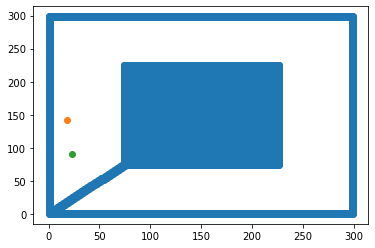

In [19]:
# floor plan creation start........................................................................................................................................................
simple_plan = build_matrix( 300, 300 )
distance_limit = 10000
simple_plan.closed_rectangle_obstacle( ( 75, 75 ), ( 75*3, 75*3 ) )
simple_plan.wall_obstacle( ( 0, 0 ), ( 75, 75 ) )
# floor plan creation end..........................................................................................................................................................
simple_plan.randomise_source( )
simple_plan.randomise_receiver( )
# simple_plan.set_source_receiver( ( 240, 70 ), ( 238, 180 ) )
simple_plan.draw()

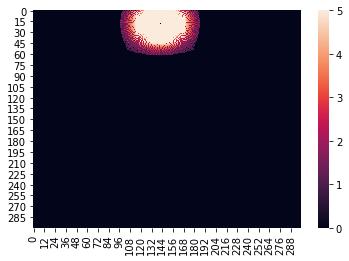

In [20]:
simple_graph = graph_formulation( simple_plan )
simple_graph.build_graph()
simple_graph.intensity_heat_map()

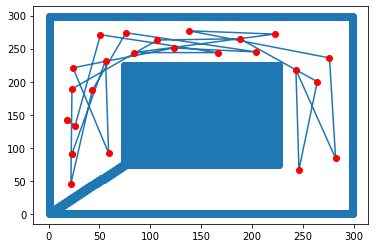

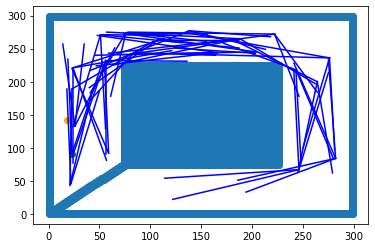

655.8517856511454


In [21]:
result, path1 = simple_graph.DFS( simple_plan.receiver )
simple_graph.print_path( path1 )
simple_graph.print_graph()
time = simple_graph.time_of_travel( path1 )
print( time )

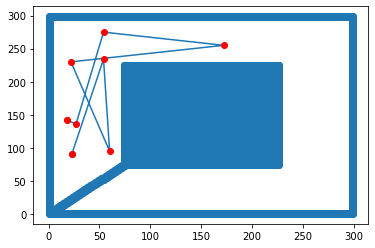

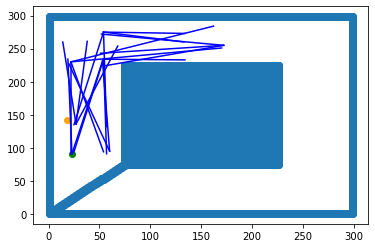

204.97277319347214


In [22]:
simple_graph.build_graph()
result, path2 = simple_graph.selective_search( simple_plan.receiver )
simple_graph.print_path( path2 )
simple_graph.print_graph()
time = simple_graph.time_of_travel( path2 )
print( time )

Source: (86, 67)
Receiver:  (18, 71)


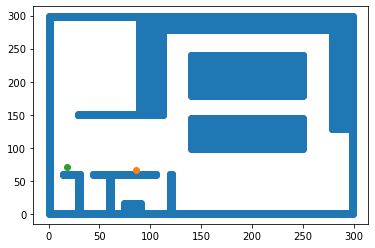

In [23]:
# floor plan creation start........................................................................................................................................................
hotel_plan = build_matrix( 300, 300 )
hotel_plan.wall_obstacle( ( 10*3, 0 ), ( 10*3, 20*3 ) )
hotel_plan.wall_obstacle( ( 20*3, 0 ), ( 20*3, 20*3 ) )
hotel_plan.wall_obstacle( ( 5*3, 20*3 ), ( 10*3, 20*3 ) )
hotel_plan.wall_obstacle( ( 15*3, 20*3 ), ( 35*3, 20*3 ) )
hotel_plan.wall_obstacle( ( 40*3, 0 ), ( 40*3, 20*3 ) )
hotel_plan.wall_obstacle( ( 10*3, 50*3 ), ( 30*3, 50*3 ) )
hotel_plan.wall_obstacle( ( 30*3, 50*3 ), ( 30*3, 99*3 ) )
hotel_plan.closed_rectangle_obstacle( ( 30*3, 50*3 ), ( 37*3, 99*3 ) )
hotel_plan.closed_rectangle_obstacle( ( 93*3, 43*3 ), ( 99*3, 99*3 ) )
hotel_plan.closed_rectangle_obstacle( ( 37*3, 93*3 ), ( 93*3, 99*3 ) )
hotel_plan.closed_rectangle_obstacle( ( 47*3, 60*3 ), ( 83*3, 80*3 ) )
hotel_plan.closed_rectangle_obstacle( ( 47*3, 33*3 ), ( 83*3, 48*3 ) )
hotel_plan.closed_rectangle_obstacle( ( 25*3, 0 ), ( 30*3, 5*3 ) )
# floor plan creation end..........................................................................................................................................................
hotel_plan.randomise_source( )
hotel_plan.randomise_receiver( )
hotel_plan.draw( )

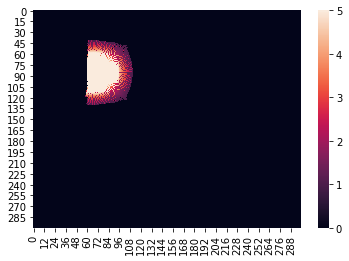

In [24]:
hotel_graph = graph_formulation( hotel_plan )
hotel_graph.build_graph()
hotel_graph.intensity_heat_map()

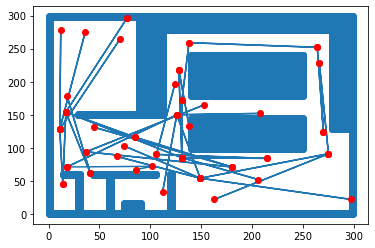

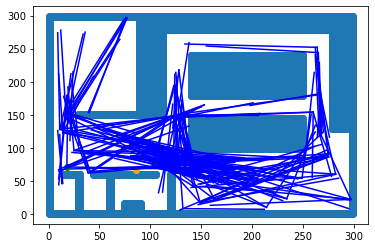

2009.6189658432104


In [27]:
result, path1 = hotel_graph.DFS( hotel_plan.receiver )
hotel_graph.print_path( path1 )
hotel_graph.print_graph()
time = hotel_graph.time_of_travel( path1 )
print( time )

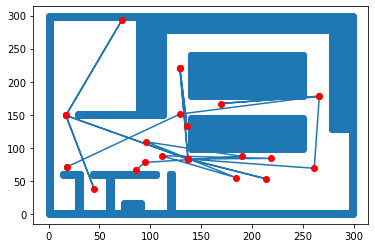

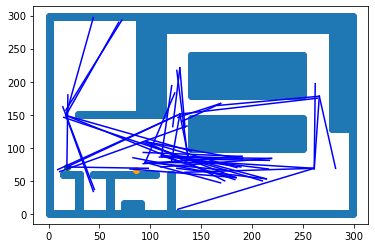

678.3219538088849


In [28]:
hotel_graph.build_graph()
result, path2 = hotel_graph.selective_search( hotel_plan.receiver )
hotel_graph.print_path( path2 )
hotel_graph.print_graph()
time = hotel_graph.time_of_travel( path2 )
print( time )

Source: (96, 204)
Receiver:  (261, 130)


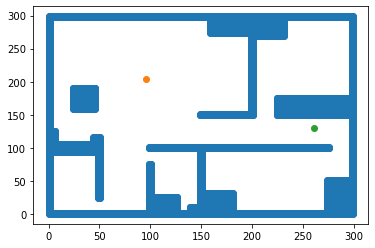

In [35]:
# floor plan creation start........................................................................................................................................................
house_plan = build_matrix( 300, 300 )
house_plan.wall_obstacle( ( 30*5 ,30*5 ), ( 40*5, 30*5 ) )
house_plan.wall_obstacle( ( 45*5 ,30*5 ), ( 59*5, 30*5 ) )
house_plan.wall_obstacle( ( 40*5, 30*5 ), ( 40*5, 59*5 ) )
house_plan.wall_obstacle( ( 10*5, 5*5 ), ( 10*5, 20*5 ) )
house_plan.wall_obstacle( ( 55*5, 20*5 ), ( 20*5, 20*5 ) )
house_plan.wall_obstacle( ( 30*5, 0*5 ), ( 30*5, 20*5 ) )
house_plan.wall_obstacle( ( 20*5, 0 ), ( 20*5, 15*5 ) )
house_plan.closed_rectangle_obstacle( ( 5*5, 32*5 ), ( 9*5, 38*5 ) )
house_plan.closed_rectangle_obstacle( ( 0, 19*5 ), ( 10*5, 21*5 ) )
house_plan.closed_rectangle_obstacle( ( 9*5, 21*5 ), ( 10*5, 23*5 ) )
house_plan.closed_rectangle_obstacle( ( 0, 21*5 ), ( 1*5, 25*5 ) )
house_plan.closed_rectangle_obstacle( ( 32*5, 55*5 ), ( 40*5, 59*5 ) )
house_plan.closed_rectangle_obstacle( ( 40*5, 40*5 ), ( 40*5, 59*5 ) )
house_plan.closed_rectangle_obstacle( ( 20*5, 0 ), ( 25*5, 5*5 ) )
house_plan.closed_rectangle_obstacle( ( 28*5, 0 ), ( 30*5, 2*5 ) )
house_plan.closed_rectangle_obstacle( ( 30*5, 0 ), ( 36*5, 6*5 ) )
house_plan.closed_rectangle_obstacle( ( 55*5, 0 ), ( 59*5, 10*5 ) )
house_plan.closed_rectangle_obstacle( ( 45*5, 30*5 ), ( 59*5, 35*5 ) )
house_plan.closed_rectangle_obstacle( ( 40*5, 54*5 ), ( 46*5, 59*5 ) )
# floor plan creation end..........................................................................................................................................................
house_plan.randomise_source( )
house_plan.randomise_receiver( )
house_plan.draw()

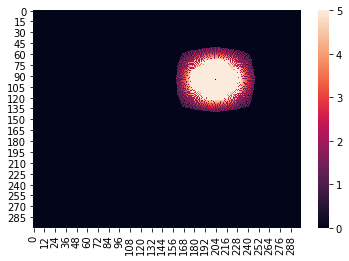

In [36]:
house_graph = graph_formulation( house_plan )
house_graph.build_graph()
house_graph.intensity_heat_map()

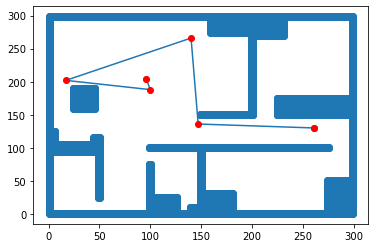

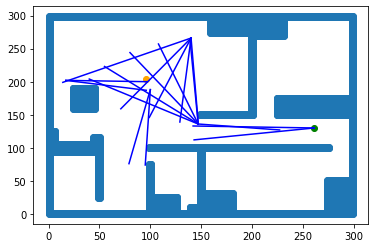

121.73304429184319


In [37]:
result, path1 = house_graph.DFS( house_plan.receiver )
house_graph.print_path( path1 )
house_graph.print_graph()
time = house_graph.time_of_travel( path1 )
print( time )

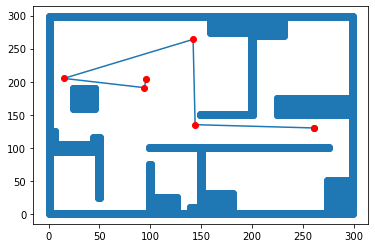

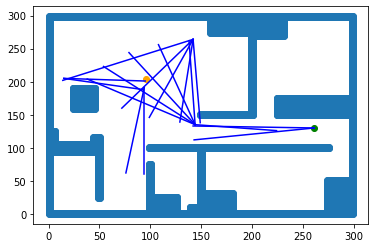

120.9083729440756


In [38]:
house_graph.build_graph()
result, path2 = house_graph.selective_search( house_plan.receiver )
house_graph.print_path( path2 )
house_graph.print_graph()
time = house_graph.time_of_travel( path2 )
print( time )

Source: (36, 420)
Receiver:  (459, 290)


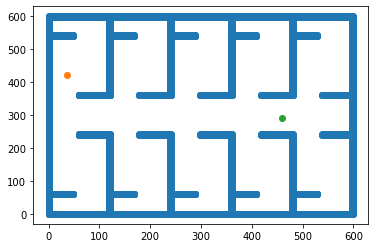

In [39]:
# floor plan creation start........................................................................................................................................................
hotel2_plan = build_matrix( 600, 600 )
hotel2_plan.wall_obstacle( ( 20*6, 0 ), ( 20*6, 40*6 ) )
hotel2_plan.wall_obstacle( ( 40*6, 0 ), ( 40*6, 40*6 ) )
hotel2_plan.wall_obstacle( ( 60*6, 0 ), ( 60*6, 40*6 ) )
hotel2_plan.wall_obstacle( ( 80*6, 0 ), ( 80*6, 40*6 ) )
hotel2_plan.wall_obstacle( ( 20*6, 60*6 ), ( 20*6, 99*6 ) )
hotel2_plan.wall_obstacle( ( 40*6, 60*6 ), ( 40*6, 99*6 ) )
hotel2_plan.wall_obstacle( ( 60*6, 60*6 ), ( 60*6, 99*6 ) )
hotel2_plan.wall_obstacle( ( 80*6, 60*6 ), ( 80*6, 99*6 ) )
hotel2_plan.wall_obstacle( ( 10*6, 40*6 ), ( 20*6, 40*6 ) )
hotel2_plan.wall_obstacle( ( 30*6, 40*6 ), ( 40*6, 40*6 ) )
hotel2_plan.wall_obstacle( ( 50*6, 40*6 ), ( 60*6, 40*6 ) )
hotel2_plan.wall_obstacle( ( 70*6, 40*6 ), ( 80*6, 40*6 ) )
hotel2_plan.wall_obstacle( ( 90*6, 40*6 ), ( 99*6, 40*6 ) )
hotel2_plan.wall_obstacle( ( 10*6, 60*6 ), ( 20*6, 60*6 ) )
hotel2_plan.wall_obstacle( ( 30*6, 60*6 ), ( 40*6, 60*6 ) )
hotel2_plan.wall_obstacle( ( 50*6, 60*6 ), ( 60*6, 60*6 ) )
hotel2_plan.wall_obstacle( ( 70*6, 60*6 ), ( 80*6, 60*6 ) )
hotel2_plan.wall_obstacle( ( 90*6, 60*6 ), ( 99*6, 60*6 ) )
hotel2_plan.wall_obstacle( ( 0*6, 10*6 ), ( 8*6, 10*6 ) )
hotel2_plan.wall_obstacle( ( 20*6, 10*6 ), ( 28*6, 10*6 ) )
hotel2_plan.wall_obstacle( ( 40*6, 10*6 ), ( 48*6, 10*6 ) )
hotel2_plan.wall_obstacle( ( 60*6, 10*6 ), ( 68*6, 10*6 ) )
hotel2_plan.wall_obstacle( ( 80*6, 10*6 ), ( 88*6, 10*6 ) )
hotel2_plan.wall_obstacle( ( 0, 90*6 ), ( 8*6, 90*6 ) )
hotel2_plan.wall_obstacle( ( 20*6, 90*6 ), ( 28*6, 90*6 ) )
hotel2_plan.wall_obstacle( ( 40*6, 90*6 ), ( 48*6, 90*6 ) )
hotel2_plan.wall_obstacle( ( 60*6, 90*6 ), ( 68*6, 90*6 ) )
hotel2_plan.wall_obstacle( ( 80*6, 90*6 ), ( 88*6, 90*6 ) )
# floor plan creation end..........................................................................................................................................................
hotel2_plan.randomise_source( )
hotel2_plan.randomise_receiver( )
hotel2_plan.draw( )

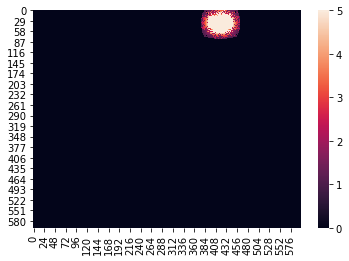

In [40]:
hotel2_graph = graph_formulation( hotel2_plan )
hotel2_graph.build_graph()
hotel2_graph.intensity_heat_map()

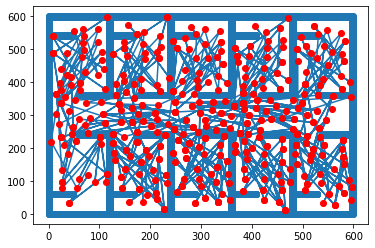

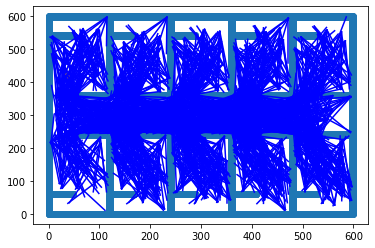

18096.51471859334


In [41]:
result, path1 = hotel2_graph.DFS( hotel2_plan.receiver )
hotel2_graph.print_path( path1 )
hotel2_graph.print_graph()
time = hotel2_graph.time_of_travel( path1 )
print( time )

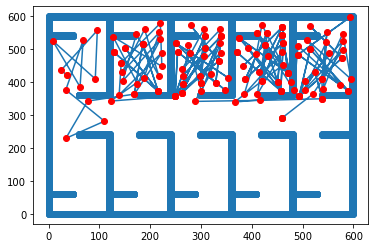

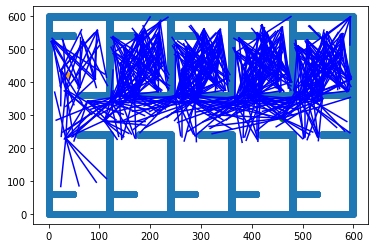

4990.645100053879


In [42]:
hotel2_graph.build_graph()
result, path2 = hotel2_graph.selective_search( hotel2_plan.receiver )
hotel2_graph.print_path( path2 )
hotel2_graph.print_graph()
time = hotel2_graph.time_of_travel( path2 )
print( time )

In [3]:
def cdf_time(plan,num):
    time_data = []
    i = 0
    j = 0 
    while(i<num):
        flag = 1
        plan.randomise_source()
        plan.randomise_receiver()
        graph = graph_formulation( plan )
        graph.build_graph()
        result, temp_path = graph.DFS( plan.receiver )
        temp_time = graph.time_of_travel(temp_path,speed = 5,changeover = 5)
        time_data.append(temp_time)
        i+=1
    N = len(time_data)
    np_data = np.array(time_data)
    x = np.sort(np_data)
    y = np.arange(N) / float(N)
    plt.xlabel('time')
    plt.ylabel('cdf')
    plt.plot(x, y, label = 'Blind Search', marker = 'o' )
    
def cdf_time_selective(plan,num):
    time_data = []
    i = 0
    j = 0 
    while(i<num):
        flag = 1
        plan.randomise_receiver()
        graph = graph_formulation( plan )
        graph.build_graph()
        result, temp_path = graph.selective_search( plan.receiver )
        temp_time = graph.time_of_travel(temp_path,speed = 5,changeover = 5)
        time_data.append(temp_time)
        i+=1
    N = len(time_data)
    np_data = np.array(time_data)
    x = np.sort(np_data)
    y = np.arange(N) / float(N)
    print(j)
    plt.xlabel('time')
    plt.ylabel('cdf')
    plt.plot(x, y, label = 'Selective Search', marker = 'o' )




Source: (110, 292)
Receiver:  (118, 233)


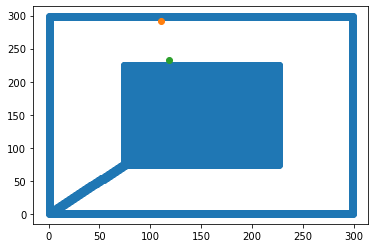

Receiver:  (237, 124)
Receiver:  (284, 202)
Receiver:  (269, 89)
Receiver:  (171, 57)
Receiver:  (145, 264)
Receiver:  (24, 267)
Receiver:  (173, 15)
Receiver:  (8, 252)
Receiver:  (134, 4)
Receiver:  (102, 245)
Receiver:  (131, 235)
Receiver:  (276, 10)
Receiver:  (208, 241)
Receiver:  (81, 254)
Receiver:  (19, 129)
Receiver:  (59, 107)
Receiver:  (90, 17)
Receiver:  (217, 36)
Receiver:  (17, 213)
Receiver:  (37, 22)
Receiver:  (121, 265)
Receiver:  (280, 33)
Receiver:  (289, 4)
Receiver:  (142, 261)
Receiver:  (69, 205)
Receiver:  (20, 78)
Receiver:  (259, 81)
Receiver:  (248, 80)
Receiver:  (195, 260)
Receiver:  (218, 260)
Receiver:  (13, 168)
Receiver:  (264, 279)
Receiver:  (8, 122)
Receiver:  (21, 237)
Receiver:  (278, 218)
Receiver:  (45, 258)
Receiver:  (164, 53)
Receiver:  (180, 15)
Receiver:  (86, 243)
Receiver:  (134, 46)
Receiver:  (32, 156)
Receiver:  (253, 143)
Receiver:  (21, 291)
Receiver:  (11, 47)
Receiver:  (221, 242)
Receiver:  (192, 254)
Receiver:  (40, 242)
Receiv

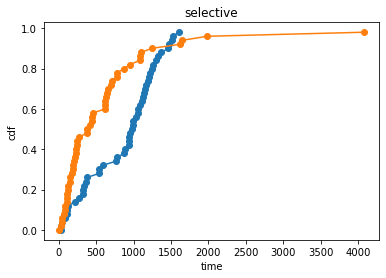

In [4]:
# floor plan creation start........................................................................................................................................................
simple_plan = build_matrix( 300, 300 )
distance_limit = 1000
simple_plan.closed_rectangle_obstacle( ( 75, 75 ), ( 75*3, 75*3 ) )
simple_plan.wall_obstacle( ( 0, 0 ), ( 75, 75 ) )
# floor plan creation start........................................................................................................................................................
simple_plan.randomise_source( )
simple_plan.randomise_receiver( )
cdf_time(simple_plan,50)
cdf_time_selective(simple_plan,50)
plt.legend()
plt.show()